# Example – fnding teen market segments using k-means clustering

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix

# Step 1 – collecting data

In [2]:
#The data was sampled evenly across four high school graduation years (2006 through 2009) 
#representing the senior, junior, sophomore, and freshman classes at the time of data collection. 
df = pd.read_csv('10 snsdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
gradyear        30000 non-null int64
gender          27276 non-null object
age             24914 non-null float64
friends         30000 non-null int64
basketball      30000 non-null int64
football        30000 non-null int64
soccer          30000 non-null int64
softball        30000 non-null int64
volleyball      30000 non-null int64
swimming        30000 non-null int64
cheerleading    30000 non-null int64
baseball        30000 non-null int64
tennis          30000 non-null int64
sports          30000 non-null int64
cute            30000 non-null int64
sex             30000 non-null int64
sexy            30000 non-null int64
hot             30000 non-null int64
kissed          30000 non-null int64
dance           30000 non-null int64
band            30000 non-null int64
marching        30000 non-null int64
music           30000 non-null int64
rock            30000 non-null int64


# Step 2 – exploring and preparing the data

In [21]:
#gender - dummy coding missing values 
df['gender_female'] = df['gender'].apply(lambda x: 1 if x == 'F' else 0)
df['gender_male'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)
df['gender_NOgender'] = df['gender'].apply(lambda x: 1 if x in [np.NaN] else 0)

In [35]:
#age - imputing the missing values
temp = pd.DataFrame(df.groupby(['gradyear'], axis=0, as_index=False)['age'].mean())

def age_impute (cols):
    x = cols[0]
    y = cols[1]
    if x == 2006 and y in [np.NaN]: return 19.13
    elif x == 2007 and y in [np.NaN]: return 18.39
    elif x == 2008 and y in [np.NaN]: return 17.52
    elif x == 2009 and y in [np.NaN]: return 16.87
    else: return y

df['age2'] = df[['gradyear','age']].apply(age_impute,axis=1)
temp = pd.DataFrame(df.groupby(['gradyear'], axis=0, as_index=False)['age2'].mean())
temp

,gradyear,age2
0,2006,19.137241
1,2007,18.391459
2,2008,17.523867
3,2009,16.876025


# Step 3 – training a model on the data

In [39]:
kmeans = KMeans(n_clusters=5)
x = df.drop(['gradyear', 'gender', 'age', 'friends', 'gender_female', 'gender_male', 'gender_NOgender', 'age2'],axis=1)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Step 4 – evaluating model performance

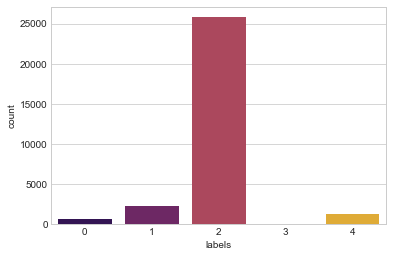

In [66]:
y_pred = pd.DataFrame(kmeans.labels_)
y_pred.columns = ['labels']
sns.countplot('labels',data=y_pred,palette='inferno')

In [67]:
#For a more in-depth look at the clusters, we can examine the coordinates of the cluster centroids 
kmeans.cluster_centers

array([[  2.97090352e-01,   2.72588055e-01,   2.00612557e-01,
          1.83767228e-01,   1.57733538e-01,   1.54670750e-01,
          1.27105666e-01,   1.02603369e-01,   9.34150077e-02,
          1.80704441e-01,   3.75191424e-01,   2.05206738e-01,
          1.62327718e-01,   1.54670750e-01,   9.80091884e-02,
          3.73660031e-01,   4.02756508e-01,   3.98162328e-02,
          1.00765697e+00,   3.00153139e-01,   6.22052067e+00,
          1.40581930e+00,   1.22205207e+00,   2.67993874e-01,
          4.31852986e-01,   1.51607963e-01,   1.16385911e-01,
          2.52679939e-01,   3.87442573e-01,   2.32771822e-01,
          6.27871363e-02,   4.44104135e-02,   4.11944870e-01,
          3.15467075e-01,   1.39356815e-01,   7.65696784e-02],
       [  5.99569892e-01,   5.34623656e-01,   4.35268817e-01,
          2.91612903e-01,   2.60645161e-01,   2.71397849e-01,
          2.13333333e-01,   2.56774194e-01,   1.71612903e-01,
          3.90537634e-01,   8.54623656e-01,   1.48602151e+00,
       